In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("titanic-data/titanic_train.csv")
test_df    = pd.read_csv("titanic-data/titanic_test.csv")

# preview the data
titanic_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [3]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

In [4]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)
test_df    = test_df.drop(['Name','Ticket',  'Cabin'], axis=1)

In [5]:
titanic_df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [6]:
#titanic_df["Sex"] = titanic_df["Sex"].replace({'male':0, 'female':1}, inplace=True)
#titanic_df["Embarked"] = titanic_df["Embarked"].replace({'C':0, 'Q':1, 'S':2}, inplace=True)
titanic_df["Sex"] = pd.get_dummies(titanic_df["Sex"])
test_df["Sex"] = pd.get_dummies(test_df["Sex"])
titanic_df["Embarked"] = pd.get_dummies(titanic_df["Embarked"])
test_df["Embarked"] = pd.get_dummies(test_df["Embarked"])
#test_df["PassengerId"] = test_df["PassengerId"].fillna(method='ffill', inplace=True)
#test_df = test_df.fillna(method='ffill', inplace=True)



In [7]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

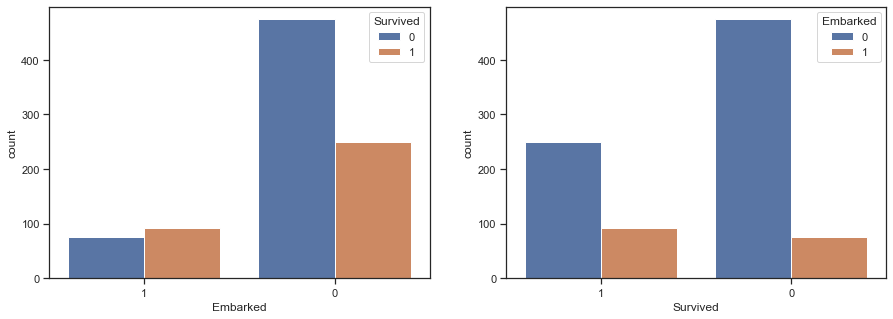

In [8]:
# Embarked
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".

# plot
sns.set_theme(style="ticks")
# g = sns.catplot(x="Survived", y="Embarked", hue="Survived", data=titanic_df)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="Embarked", hue="Survived",data=titanic_df,order=[1,0], ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

<AxesSubplot:xlabel='Survived'>

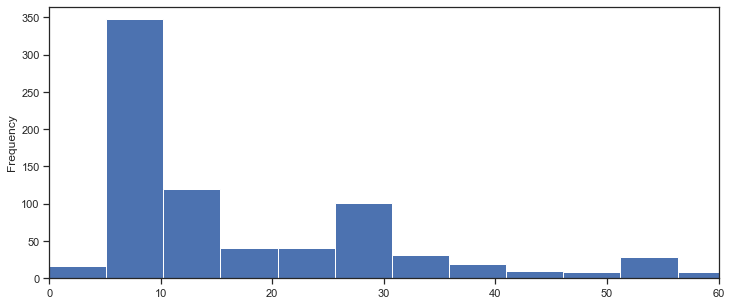

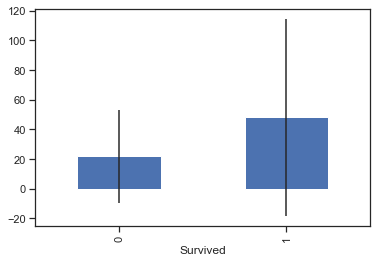

In [9]:
# Fare

# only for test_df, since there is missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
average_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(12,5),bins=100, xlim=(0,60))

average_fare.index.names = std_fare.index.names = ["Survived"]
average_fare.plot(yerr=std_fare,kind='bar',legend=False)

In [10]:
# Age 

# fill NaN values in Age column 
titanic_df[['Age']] = titanic_df[['Age']].fillna(method='ffill')

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

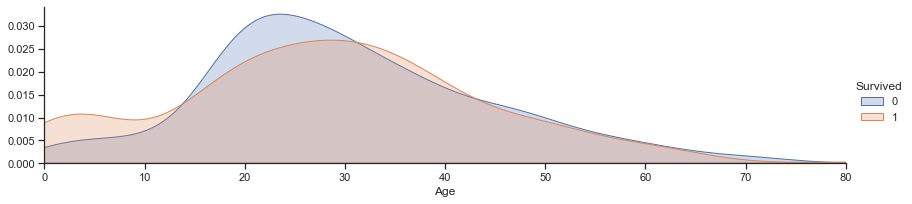

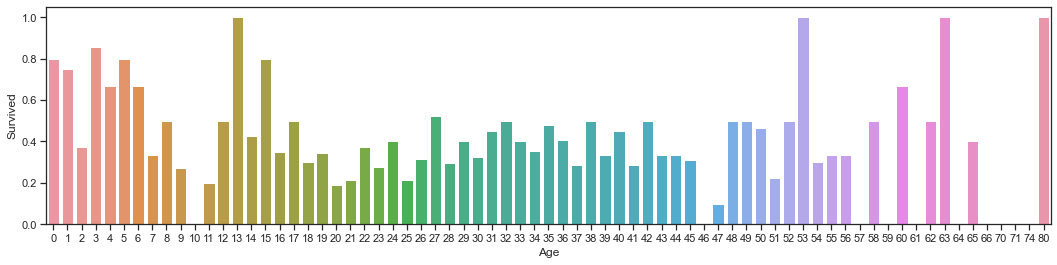

In [11]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

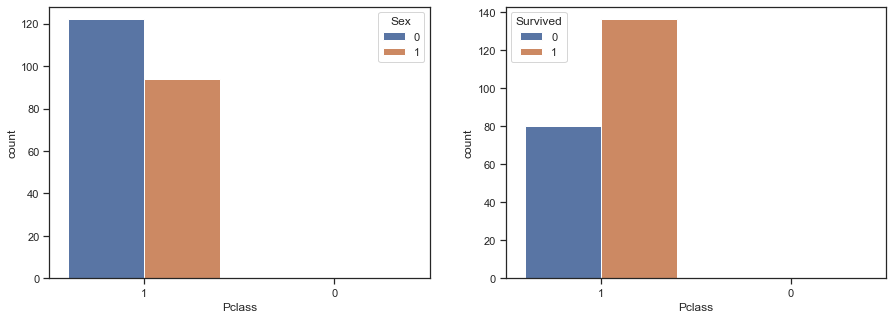

In [12]:
# sns.set_theme(style="ticks")
# fig,(axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
# sns.countplot(x='Pclass',hue='Sex',data=titanic_df,order=[0,1], ax=axis1)
# sns.countplot(x='Pclass',hue='Survived',data=titanic_df,order=[0,1], ax=axis2)


# plot
sns.set_theme(style="ticks")
# g = sns.catplot(x="Survived", y="Embarked", hue="Survived", data=titanic_df)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x="Pclass", hue="Sex",data=titanic_df,order=[1,0], ax=axis1)
sns.countplot(x='Pclass', hue="Survived", data=titanic_df, order=[1,0], ax=axis2)

In [13]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,1
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [16]:
# Combine Parch and sibsp into new column family
titanic_df['Family'] = titanic_df['Parch'] + titanic_df["SibSp"] 
titanics = titanic_df['Family']

# Sort the column into boolean values
def titanic(column):
    for x in column:
        if x ==1:
            column[:1]
        elif x == 0:
            column[:0]
        elif x == 2:
            column[:1]    
        

titanic_df['family_new'] = titanic_df['Family'].apply(titanic(titanics)) 

# new_titan.apply(titanic(titanics))
for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)

TypeError: 'NoneType' object is not callable

In [ ]:
        
# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

In [ ]:
titanic_df.head()

In [ ]:
titanic_df.loc[titanic_df['Family'] == 2]

In [ ]:
titanic_df["Survived"].groupby(titanic_df["Pclass"]).describe()

In [ ]:
# Pclass
sns.catplot(x='Pclass',y='Survived', data=titanic_df, kind='violin')

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)


In [ ]:
test_df["Age"].fillna(test_df["Age"].mean(), inplace=True)

In [ ]:
# define training and testing sets
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [ ]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

score = logreg.score(X_train, Y_train)

print(f'With Logistic Regression we can predict with {round(score*100,2)}% accuracy who survived in the titanic')

In [ ]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

score = svc.score(X_train, Y_train)

print(f'With Support Vector Machines model we can predict with {round(score*100,2)}% accuracy who survived in the titanic')

In [ ]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

score = random_forest.score(X_train, Y_train)

print(f'With Random Forests we can predict with {round(score*100,2)}% accuracy who survived in the titanic')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

score = knn.score(X_train, Y_train)
print(f'With K Nearest Neighbours we can predict with {round(score*100,2)}% accuracy who survived in the titanic')

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

score = gaussian.score(X_train, Y_train)
print(f'With Guassian Niave Bayes we can predict with {round(score*100,2)}% accuracy who survived in the titanic')

In [ ]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

In [ ]:
print("Error for the Sex correlation coefficient. Higher than 1.0")
print("Error for the Class_1 correlation coefficient. Higher than 1.0")